In [2]:
import pandas as pd
import numpy as np
from transformers import pipeline

c:\Users\charl\miniconda3\envs\nlp_fs\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%pip install python-docx

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 3.8/3.8 MB 20.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
from docx import Document

In [13]:
agent_classifier = pipeline("text-classification", model="Moritz-Pfeifer/CentralBankRoBERTa-agent-classifier")

Device set to use cpu


In [14]:
# Load the SentimentClassifier model
sentiment_classifier = pipeline("text-classification", model="Moritz-Pfeifer/CentralBankRoBERTa-sentiment-classifier")

Device set to use cpu


In [12]:
agent_result = agent_classifier("We used our liquidity tools to make funding available to banks that might need it.")
print("Agent Classification:", agent_result[0]['label'])

# Returns: Agent Classification: Financial Sector
# agent_result has structure [{'label': 'Financial Sector', 'score': 0.9753041863441467}]

Agent Classification: Financial Sector


In [13]:
sentiment_result = sentiment_classifier("We used our liquidity tools to make funding available to banks that might need it.")
print("Sentiment Classification:", sentiment_result[0]['label'])

# Returns: Sentiment Classification: positive
# sentiment_result has structure [{'label': 'positive', 'score': 0.8233762383460999}]

Sentiment Classification: positive


In [16]:
long_chunk = "Domestically, UK household and corporate borrowers are likely to remain resilient in aggregate. The UK banking system is in a strong position to support households and businesses, even if economic, financial and business conditions were to be substantially worse than expected, as demonstrated by the results of the 2024 desk-based stress test."
agent_long = agent_classifier(long_chunk)
sentiment_long = sentiment_classifier(long_chunk)

print("Agent Classification:", agent_long[0]['label'])
print("Sentiment Classification:", sentiment_long[0]['label'])

Agent Classification: Financial Sector
Sentiment Classification: positive


In [17]:
sentiment_long

[{'label': 'positive', 'score': 0.7588902115821838}]

In [18]:
def read_and_split_word_doc(file_path):
    """
    Reads the text of a Word document and splits it into chunks wherever there is a new line character.

    Parameters:
        file_path (str): The path to the Word document.

    Returns:
        list: A list of text chunks split by new lines.
    """
    # Load the Word document
    document = Document(file_path)

    # Extract all text from the document
    full_text = ""
    for paragraph in document.paragraphs:
        full_text += paragraph.text + "\n"  # Add a new line after each paragraph to maintain structure

    # Split the text into chunks based on new line characters
    chunks = full_text.split("\n")

    # Remove any empty strings from the list
    chunks = [chunk for chunk in chunks if chunk.strip() != "" and chunk[-1] == "." and chunk[0].isupper()]

    return chunks


In [19]:
test = read_and_split_word_doc("C:\\Users\\charl\\OneDrive\\Uni\\Masters\\Dissertation\\NLP_FS\\Data\\Reports\\2024_1.docx")

In [20]:
test

['The Financial Policy Committee (FPC) seeks to ensure the UK financial system is prepared for, and resilient to, the wide range of risks it could face – so that the system is able to absorb rather than amplify shocks and serve UK households and businesses.',
 'The overall risk environment remains broadly unchanged from Q1. Markets continue to price mostly for a benign central case outlook, and some risk premia have tightened even further, despite the global risk environment facing several challenges. Some of these challenges have become more concerning and proximate.',
 'In aggregate, UK household and corporate borrowers have been resilient, although many remain under pressure. UK banks are in a strong position to support households and businesses, even if economic and financial conditions were substantially worse than expected.',
 'The adjustment to the higher interest rate environment is continuing globally, including as businesses and households refinance their debt. Risks are crys

In [21]:
# Send each element of the list to the agent and sentiment classifiers
agent_results = [agent_classifier(chunk) for chunk in test]
sentiment_results = [sentiment_classifier(chunk) for chunk in test]

# Extract the labels from the results
agent_labels = [result[0]['label'] for result in agent_results]
sentiment_labels = [result[0]['label'] for result in sentiment_results]

# Extract the scores from the results
agent_scores = [result[0]['score'] for result in agent_results]
sentiment_scores = [result[0]['score'] for result in sentiment_results]

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    "Text Chunk": test,
    "Agent Label": agent_labels,
    "Agent Score": agent_scores,
    "Sentiment Label": sentiment_labels,
    "Sentiment Score": sentiment_scores
})

array([<Axes: title={'center': 'negative'}>,
       <Axes: title={'center': 'positive'}>], dtype=object)

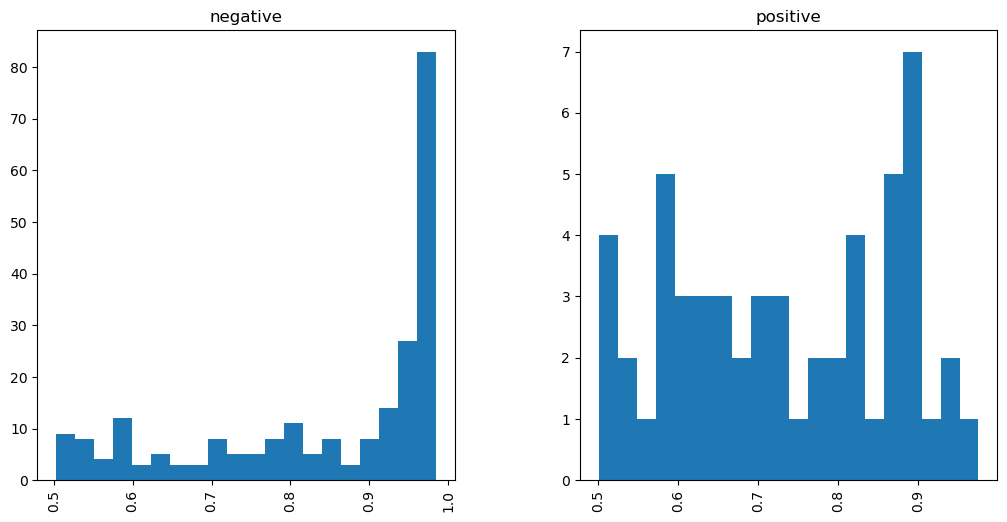

In [24]:
# Average sentiment score by sentiment label
results_df.groupby("Sentiment Label")["Sentiment Score"].mean()
# We see that average sentiment score is noticably higher for negative than positive sentiment

# histogram of sentiment scores by sentiment label
results_df.hist(column="Sentiment Score", by="Sentiment Label", bins=20, figsize=(12, 6))
# Negative label has most of its scores above 0.9 and then a fairly uniform distribution between 0.5 and 0.9
# Positive label label is much choppyer with 